In [1]:
import numpy as np
from pak.plotfunc import *
from pak.function import *

In [2]:
f = [F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24]
    
mindata = [79.48,66.95,77.66,77.66,66.71,65.87,92.94,98.62,65.61,59.13,76.27,56.61,
           68.42,77.31,70.03,71.35,69.83,119.54,71.69,71.29,124.08,51.57,85.39,93.30]


In [3]:
n_calls = 100
n_repeats = 30

绘制简单后悔与瞬时后悔图像

In [298]:
title = 24
csvlist = ["F"+str(title),"F"+str(title)+'_pre'] 
func_val = []
res = []
true_minimum = mindata[title-1]
for csv in csvlist:
    with open("Data\\data4D\\"+csv+".csv","r") as file: 
        count = 0
        for line in file:
            macoiter = count//n_calls # 实验序数
            iter = count-macoiter*n_calls # 迭代序数
            if iter<=n_calls:
                data = [float(x) for x in line.strip().split(",")]
                func_val.append(f[title-1](data))
            count = count+1
resultList = [] # 储存绘图所需的所有信息
i = 0
name = ['normal','predict']
for csv in csvlist:
    n = len(func_val)//len(csvlist)
    resultList.append((name[i],[np.array(func_val[j:j+n_calls]) for j in range(i*n, (i+1)*n, n_calls)])) # 将predictvalue列表拆分为正确的形式
    i = i+1

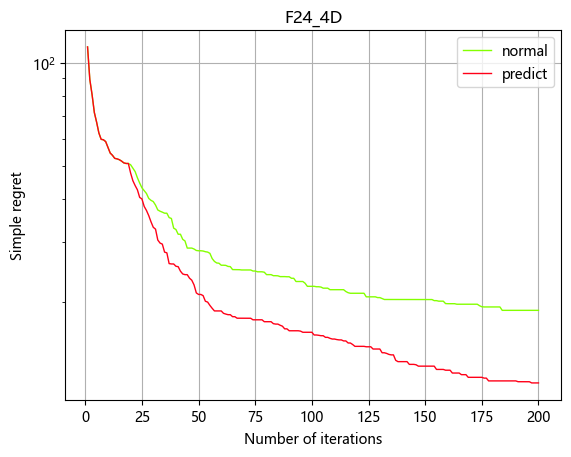

In [299]:
plot = plot_SimpleRegret(result_list=resultList,
                         n_calls = n_calls,
                        true_minimum=true_minimum-1e-6, 
                        yscale='log',
                        title="F"+str(title)+"_4D")

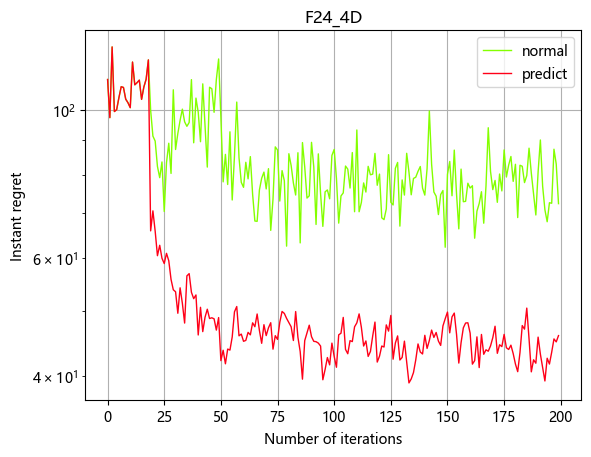

In [300]:
plot = plot_InstantRegret(result_list=resultList,
                         n_calls = n_calls,
                        true_minimum=true_minimum-1e-6,
                        yscale='log',
                        title="F"+str(title)+"_4D") 

建立分析数据表格

In [7]:
DF = []
sim = []
pre = []
pre100 = []
for i in range(24):
    count1 = 1
    count2 = 1
    simmin = 100000000
    premin = 100000000
    simnum = 0
    prenum = 0
    with open("Data\\data2D\\F"+str(i+1)+'.csv') as file:
        for line in file:
            data = [float(x) for x in line.strip().split(",")]
            if f[i](data) < simmin:
                simmin = f[i](data)
                simnum = count1%n_calls
                if count1%n_calls == 0:
                    simnum = n_calls
            if count1 % n_calls == 0:
                sim.append([simnum,simmin])
                simmin = 100000000
            count1 = count1+1
    with open("Data\\data2D\\F"+str(i+1)+'_pre.csv') as file:
        for line in file:
            data = [float(x) for x in line.strip().split(",")]
            if f[i](data)<premin:
                premin = f[i](data)
                prenum = count2%n_calls
                if count2%n_calls==0:
                    prenum = n_calls
            if count2 % n_calls==0:
                pre100.append(f[i](data))
                pre.append([prenum,premin])
                premin = 100000000
            count2 = count2+1
for i in range(len(sim)):
    m = mindata[i//n_repeats]
    p1 = (sim[i][1]-m)/abs(m)
    p2 = (pre[i][1]-m)/abs(m)
    p3 = (pre100[i]-m)/abs(m)
    DF.append([sim[i][0],pre[i][0],sim[i][1],pre[i][1],pre100[i],p1,p2,p3])

In [ ]:
with open("anlaysData.csv","w") as file:
    np.savetxt(file,DF,delimiter=',') 

检查优化过程模型参数

In [10]:
from skopt import gp_minimize 
results = gp_minimize(f[9],bounds,n_initial_points=10,initial_point_generator='lhs',acq_func="EI",n_calls=100,random_state=1)

In [11]:
for md in results.models:
    print(md.kernel_.get_params()['k1'],end=' ')
    print(md.kernel_.get_params()['k2'])

3.1**2 * Matern(length_scale=[3.52, 0.971], nu=2.5) WhiteKernel(noise_level=0)
4.9**2 * Matern(length_scale=[4.42, 1.3], nu=2.5) WhiteKernel(noise_level=0)
1.2**2 * Matern(length_scale=[5.61, 0.21], nu=2.5) WhiteKernel(noise_level=0)
7.05**2 * Matern(length_scale=[5.47, 1.49], nu=2.5) WhiteKernel(noise_level=0)
7.3**2 * Matern(length_scale=[5.86, 1.41], nu=2.5) WhiteKernel(noise_level=0)
8.09**2 * Matern(length_scale=[6.43, 1.44], nu=2.5) WhiteKernel(noise_level=0)
8.78**2 * Matern(length_scale=[6.69, 1.5], nu=2.5) WhiteKernel(noise_level=0)
9.56**2 * Matern(length_scale=[7.09, 1.55], nu=2.5) WhiteKernel(noise_level=0)
10.6**2 * Matern(length_scale=[7.49, 1.64], nu=2.5) WhiteKernel(noise_level=0)
11.4**2 * Matern(length_scale=[7.82, 1.68], nu=2.5) WhiteKernel(noise_level=0)
12.2**2 * Matern(length_scale=[8.11, 1.72], nu=2.5) WhiteKernel(noise_level=0)
12.7**2 * Matern(length_scale=[8.23, 1.74], nu=2.5) WhiteKernel(noise_level=0)
13.3**2 * Matern(length_scale=[8.41, 1.76], nu=2.5) White